# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv('/content/airbnb_hw.csv')
data.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


<ipython-input-51-71de4bebebc6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price'] = data['Price'].astype(float)
<ipython-input-51-71de4bebebc6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Log_Price'] = np.log(data['Price'] + 1)


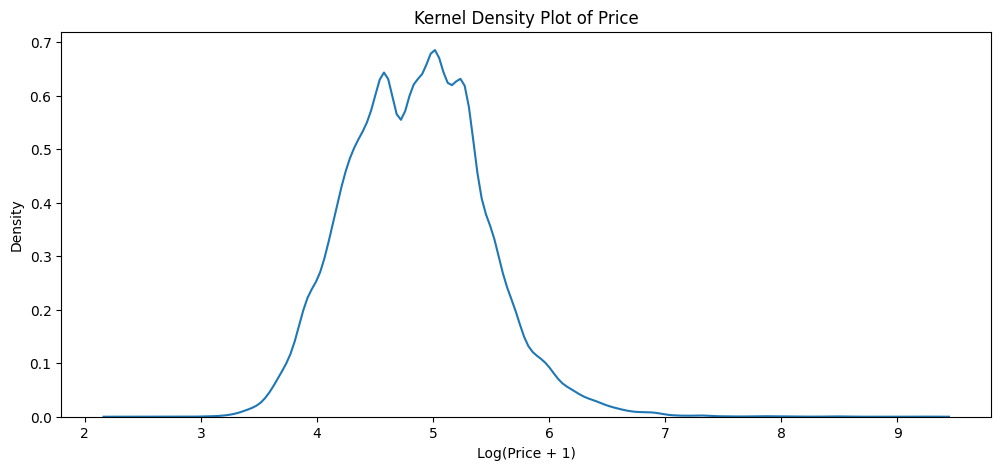

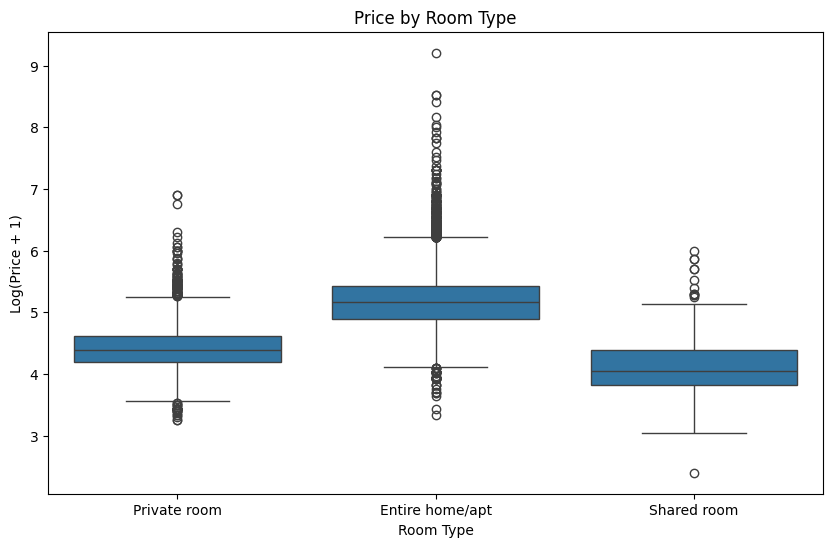

In [51]:
#part 1

data['Price'] = data['Price'].replace('[\$,]', '', regex=True).astype(float)
data = data.dropna(subset=['Review Scores Rating'])
data['Price'] = data['Price'].astype(float)

data['Log_Price'] = np.log(data['Price'] + 1)

#kernel density plot
plt.figure(figsize=(12, 5))
sns.kdeplot(data['Log_Price'])
plt.title('Kernel Density Plot of Price')
plt.xlabel('Log(Price + 1)')
plt.ylabel('Density')
plt.show()

#boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Room Type', y='Log_Price')
plt.title('Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Log(Price + 1)')
plt.show()

In [52]:
#part 2 and 3

from sklearn import linear_model

y = data['Price']
X = pd.get_dummies(data[['Neighbourhood ', 'Property Type', 'Room Type']], drop_first=True)

data = data.dropna(subset=['Price', 'Neighbourhood ', 'Property Type', 'Room Type'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = linear_model.LinearRegression().fit(X_train, y_train)

print("Training R^2 score:", reg.score(X_train, y_train))
print("Coefficients:", reg.coef_)
print("Intercept:", reg.intercept_)

#used AI to help with this code

Training R^2 score: 0.1716001654645053
Coefficients: [ 3.36697029e+01  8.24357538e+01  1.21419106e+01  5.76042127e+01
  1.95097891e+01  7.17042957e+00 -8.94762236e+00  2.97585345e+01
 -4.58589244e+01  4.01133265e+01  3.78793774e+01  3.93962107e+01
  1.51863029e-01  5.11812523e+01 -7.10542736e-15 -1.32475415e+02
  7.08892134e+01  8.13569033e+01  8.11873872e+01  9.88667140e+01
  5.41909579e+01 -1.10354792e+02 -1.35186163e+02]
Intercept: 137.8057117448825


In [72]:
#part 4

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = data[['Review Scores Rating']]
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=100)

reg = linear_model.LinearRegression().fit(X_train, y_train)
y_hat = reg.predict(X_test)
print('R-squared: ', reg.score(X_test, y_test))
print('RMSE: ', np.sqrt(np.mean((y_test - y_hat)**2)))

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
print(results)

R-squared:  0.005553734631968954
RMSE:  129.06257329128493
               variable  coefficient
0  Review Scores Rating     0.990102


In [83]:
#part 5

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

X = data[['Review Scores Rating', 'Property Type', 'Room Type']]
y = data['Price']

categorical_features = ['Property Type', 'Room Type']
numeric_features = ['Review Scores Rating']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=1.5))
])

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=100)

pipeline.fit(X_train, y_train)
y_hat = pipeline.predict(X_test)

print('R-squared: ', pipeline.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_hat)))

#used AI to help with this code

R-squared:  0.19179160036213283
RMSE:  116.35132658048875


####Part 6

The more complex model incorporates multiple features, including categorical variables, and utilizes polynomial transformation, allowing it to capture non-linear relationships in the data. In contrast, the simpler model only uses a single numerical feature and lacks these enhancements, potentially leading to less accurate predictions. The complex model does better overall, with an R-squared of .20 whereas the simple model only has an R-squared of .005.